In [1]:
#Import necessary libraries for ML and Pre-Processing

#!pip install feature-engine 
#!pip install imbalanced-learn

from feature_engine.imputation import RandomSampleImputer


#Importing the necessary libraries for EDA and model building

import numpy as np 

import pandas as pd 

from sklearn import preprocessing

import matplotlib.pyplot as plt 

import seaborn as sns

import warnings

import time

warnings.simplefilter(action='ignore')



import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


#importing ML models from sklearn library

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import RidgeClassifier

from sklearn.linear_model import LogisticRegression



#Importing metrics functions from SK Learn

from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix



from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from pprint import pprint


# # Used for Downloading MNIST

# from sklearn.datasets import fetch_mldata



# Used for Splitting Training and Test Sets

from sklearn.model_selection import train_test_split



%matplotlib inline

In [2]:
#!pip install xgboost

In [3]:
from scipy import stats

In [4]:
from tabulate import tabulate

In [5]:
df=pd.read_csv("bodyPerformance.csv")

In [6]:
df.shape

(13393, 12)

In [7]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(13392, 12)

<AxesSubplot:>

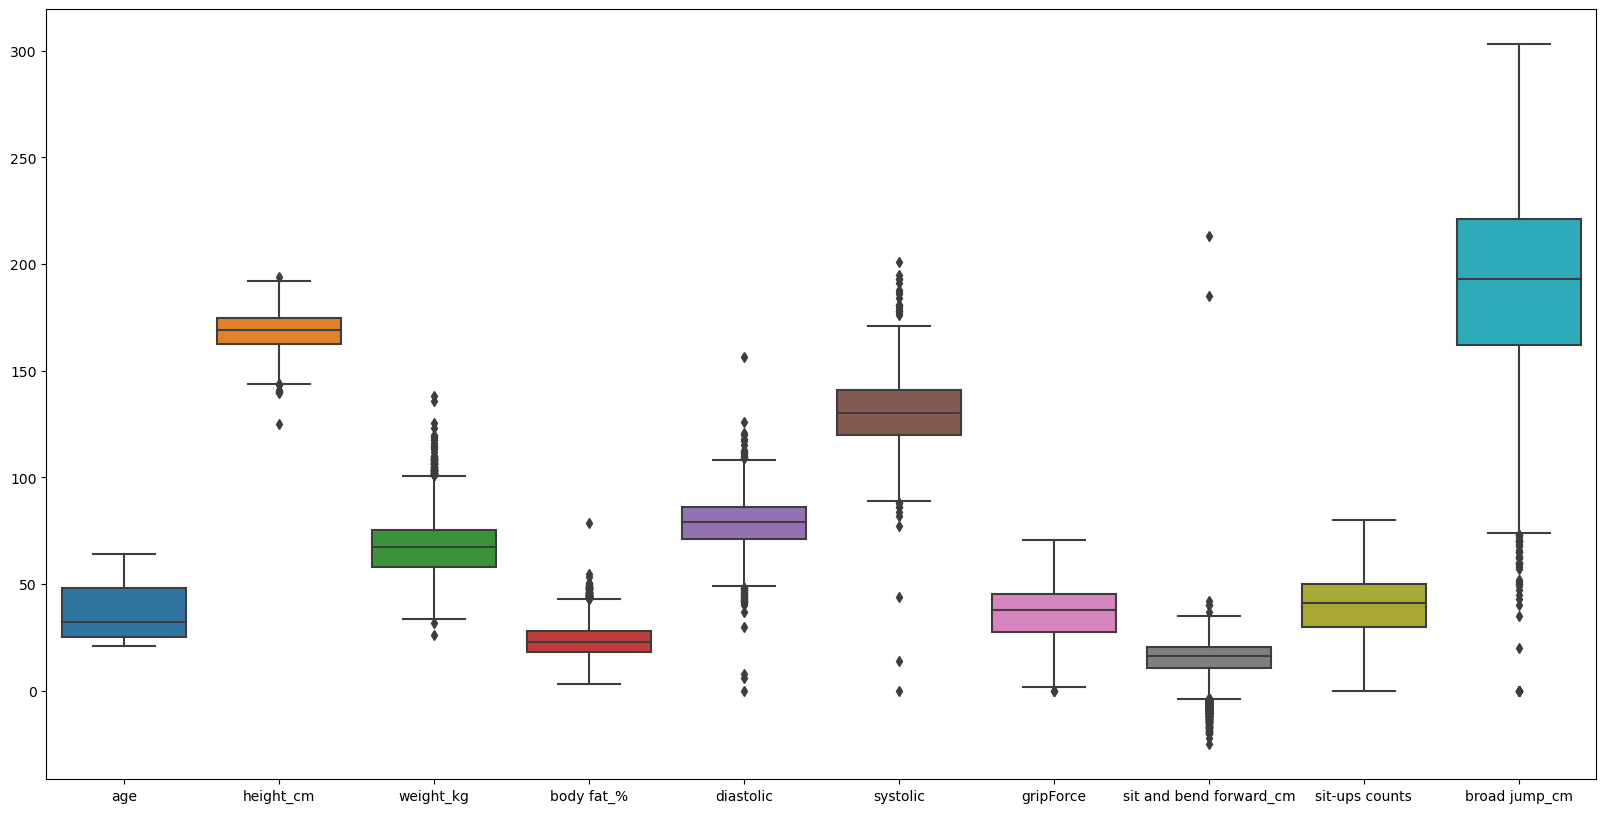

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [12]:
df1=df

In [13]:
df["BMI_val"]=round((df['weight_kg']/(df['height_cm'])/(df['height_cm']))*10000,2)

def BMI (row):
    bmi = ((row.weight_kg/row.height_cm)/row.height_cm)*10000
    if bmi>=18.5 and bmi < 25: 
        return 0 
    elif bmi < 18.5:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    else:
        return 3
    
df['BMI'] = df.apply(BMI,axis=1)

In [14]:
df["MAP"]=round((((2*df['diastolic'])+(df['systolic']))/3),2)

In [15]:
df_reset = df.drop(['BMI','weight_kg', 'height_cm','diastolic','systolic'], axis=1)

In [16]:
df_reset.dtypes

age                        float64
gender                      object
body fat_%                 float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
BMI_val                    float64
MAP                        float64
dtype: object

## Identifying outliers

Number of outliers: 226
[array([11.1 , 11.31, 11.9 , 12.7 , 13.52, 14.32, 15.08, 15.37, 15.53,
       15.69, 15.74, 15.78, 15.96, 30.94, 30.94, 30.94, 30.97, 30.98,
       30.99, 30.99, 30.99, 31.  , 31.  , 31.  , 31.02, 31.03, 31.04,
       31.06, 31.06, 31.07, 31.08, 31.15, 31.16, 31.16, 31.16, 31.16,
       31.18, 31.18, 31.18, 31.19, 31.23, 31.23, 31.24, 31.25, 31.25,
       31.26, 31.26, 31.3 , 31.32, 31.32, 31.32, 31.35, 31.35, 31.36,
       31.36, 31.36, 31.37, 31.37, 31.4 , 31.4 , 31.4 , 31.47, 31.49,
       31.49, 31.49, 31.5 , 31.5 , 31.5 , 31.5 , 31.52, 31.53, 31.55,
       31.55, 31.57, 31.57, 31.57, 31.58, 31.59, 31.61, 31.62, 31.64,
       31.68, 31.72, 31.72, 31.73, 31.75, 31.79, 31.8 , 31.82, 31.82,
       31.83, 31.83, 31.84, 31.86, 31.86, 31.87, 31.87, 31.87, 31.92,
       31.92, 31.92, 31.96, 31.99, 32.  , 32.01, 32.05, 32.08, 32.1 ,
       32.11, 32.11, 32.16, 32.17, 32.18, 32.19, 32.2 , 32.21, 32.21,
       32.22, 32.24, 32.26, 32.27, 32.27, 32.29, 32.31, 32.31, 32

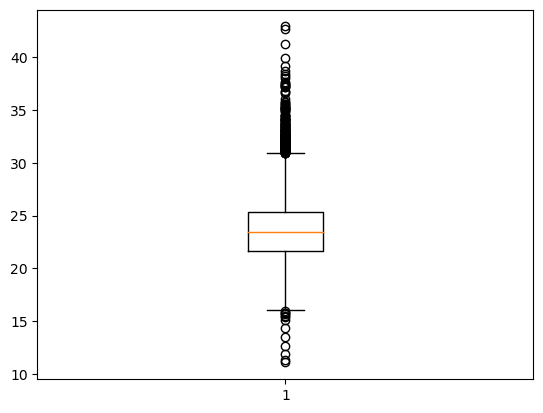

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a boxplot for 'height_cm'
boxplot = plt.boxplot(df['BMI_val'])

# Get the outliers
outliers = [np.sort(flier.get_ydata()) for flier in boxplot['fliers']]

# Count the number of outliers
num_outliers = sum(len(out) for out in outliers)

# Get the indexes of the outliers
outlier_indexes = [np.where(df['BMI_val'] == val)[0] for out in outliers for val in out]

# Flatten the list of indexes
outlier_indexes = np.concatenate(outlier_indexes)

# Print the number of outliers and their indexes
#print("Number of outliers:", num_outliers)
#print(outliers)
#outliers_table = df.iloc[outlier_indexes]
#print(outliers_table)

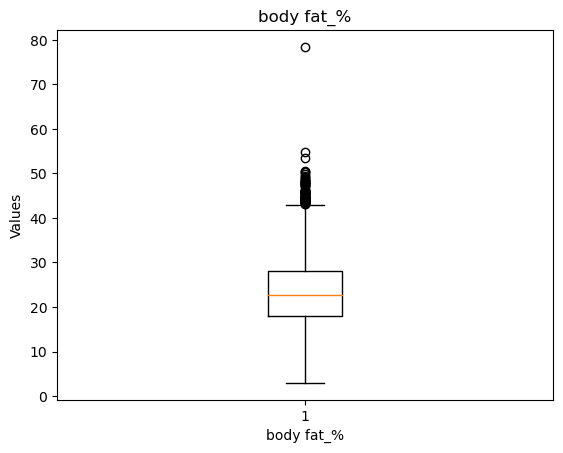

In [18]:
# Create a boxplot for 'age'
plt.boxplot(df_reset['body fat_%'])

# Set labels and title
plt.xlabel('body fat_%')
plt.ylabel('Values')
plt.title('body fat_%')

# Display the boxplot
#plt.show()

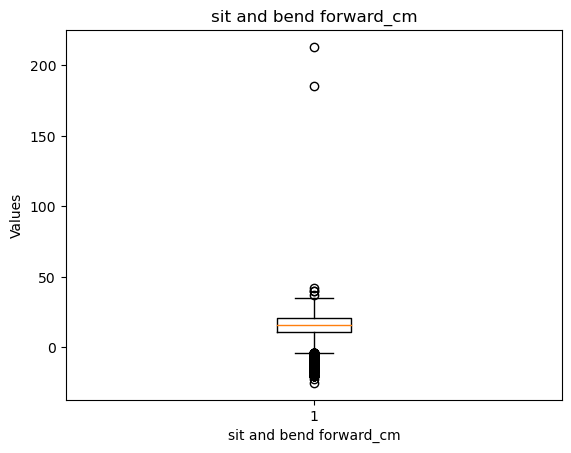

In [19]:
# Create a boxplot for 'age'
plt.boxplot(df_reset['sit and bend forward_cm'])

# Set labels and title
plt.xlabel('sit and bend forward_cm')
plt.ylabel('Values')
plt.title('sit and bend forward_cm')

# Display the boxplot
#plt.show()

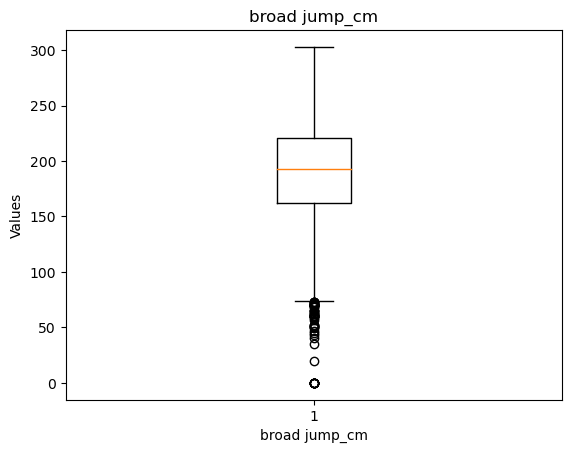

In [20]:
# Create a boxplot for 'age'
plt.boxplot(df_reset['broad jump_cm'])

# Set labels and title
plt.xlabel('broad jump_cm')
plt.ylabel('Values')
plt.title('broad jump_cm')

# Display the boxplot
#plt.show()

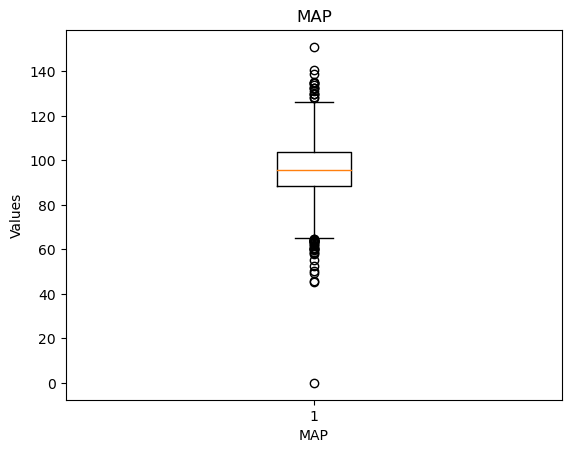

In [21]:
# Create a boxplot for 'age'
plt.boxplot(df_reset['MAP'])

# Set labels and title
plt.xlabel('MAP')
plt.ylabel('Values')
plt.title('MAP')

# Display the boxplot
#plt.show()

### Remove outliers

In [22]:

df_reset = df_reset[df_reset['body fat_%'] <= 70]
df_reset = df_reset[df_reset["sit and bend forward_cm"] <= 50]
df_reset = df_reset[df_reset["broad jump_cm"] >0]
df_reset = df_reset[df_reset["MAP"] >0]

df_reset.shape

(13378, 10)

<AxesSubplot:>

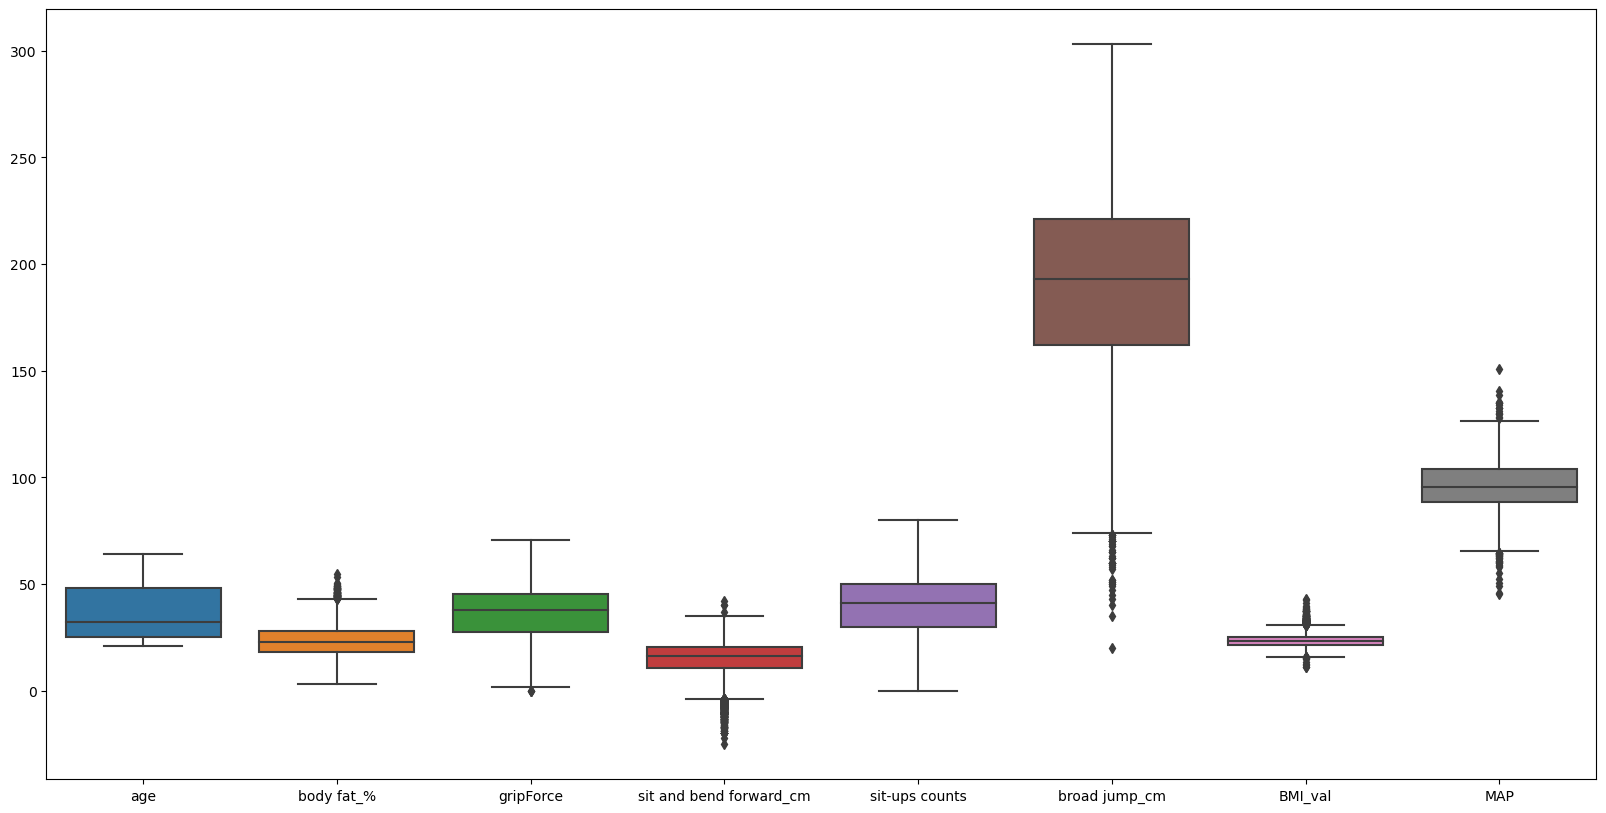

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_reset)

## EDA

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataframe is called df and contains columns 'age' and 'class'

# Create a contingency table
cont_table = pd.crosstab(df['age'], df['class'])

# Perform Chi-Square test
chi2, p_val, dof, expected = chi2_contingency(cont_table)

# Print the test results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)


Chi-Square Statistic: 429.74514206211694
P-value: 5.333291853120331e-34
Degrees of Freedom: 129


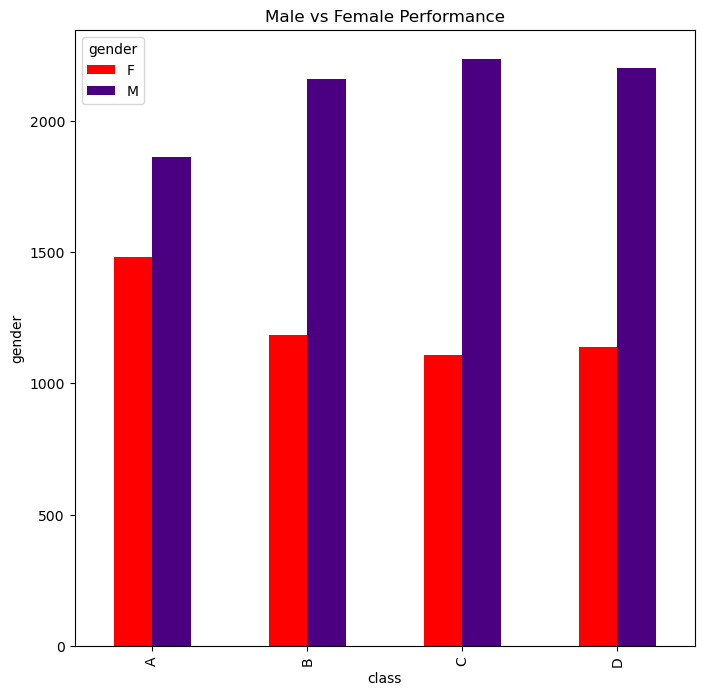

In [25]:
#Male vs Female performance
df_reset.groupby(["class","gender"]).size().unstack(level=1).plot(kind="bar",figsize=(8,8),ylabel="gender",color=["red","indigo"],title="Male vs Female Performance");

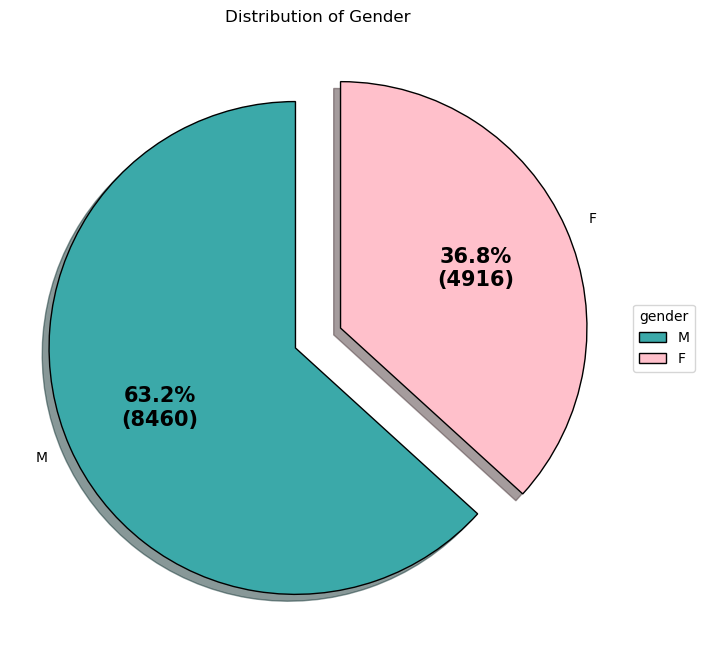

In [26]:
import matplotlib.pyplot as plt

# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

# Create a figure and axes for the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart for 'gender'
wedges, texts, autotexts = ax.pie(df_reset['gender'].value_counts(),
                                  autopct=lambda pct: pie(pct, df_reset['gender'].value_counts()),
                                  explode=(0.1, 0.1),
                                  colors=("#3BA9A9", "pink"),
                                  labels=df_reset['gender'].value_counts().index,
                                  shadow=True,
                                  startangle=90,
                                  wedgeprops={'linewidth': 1, 'edgecolor': "black"},
                                  textprops=dict(color="black"))

# Adding legend
ax.legend(wedges, df_reset['gender'].value_counts().index, title='gender',
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Distribution of Gender")

# Display the pie chart
plt.show()

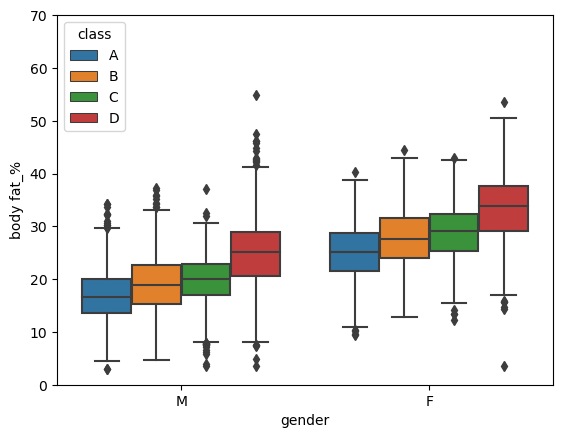

In [27]:
var = 'body fat_%'
sns.boxplot(x='gender', y=var, data=df_reset, hue='class',hue_order = ['A','B','C','D'])
plt.ylim(0, 70)
plt.show()

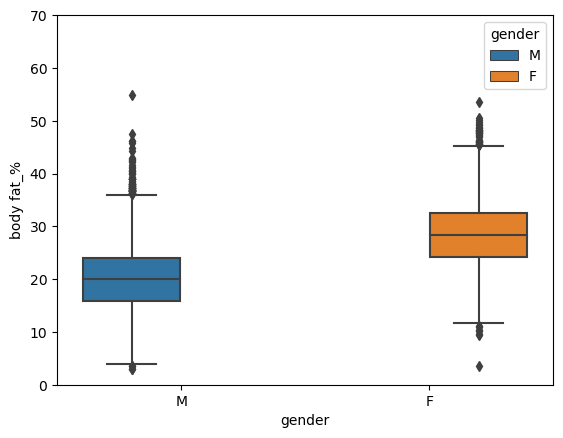

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

var = 'body fat_%'
sns.boxplot(x='gender', y=var, data=df_reset, hue='gender')
plt.ylim(0, 70)
plt.show()


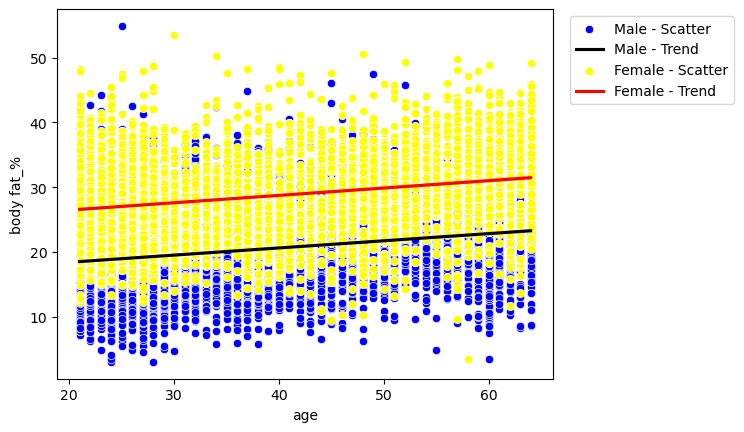

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on gender
male_data = df_reset[df_reset['gender'] == 'M']
female_data = df_reset[df_reset['gender'] == 'F']

# Create a scatter plot for males (blue color) with trend line
sns.scatterplot(y="body fat_%", x="age", data=male_data, color='blue', label='Male - Scatter')
sns.regplot(y="body fat_%", x="age", data=male_data, scatter=False, color='black', label='Male - Trend')

# Create a scatter plot for females (red color) with trend line
sns.scatterplot(y="body fat_%", x="age", data=female_data, color='yellow', label='Female - Scatter')
sns.regplot(y="body fat_%", x="age", data=female_data, scatter=False, color='red', label='Female - Trend')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


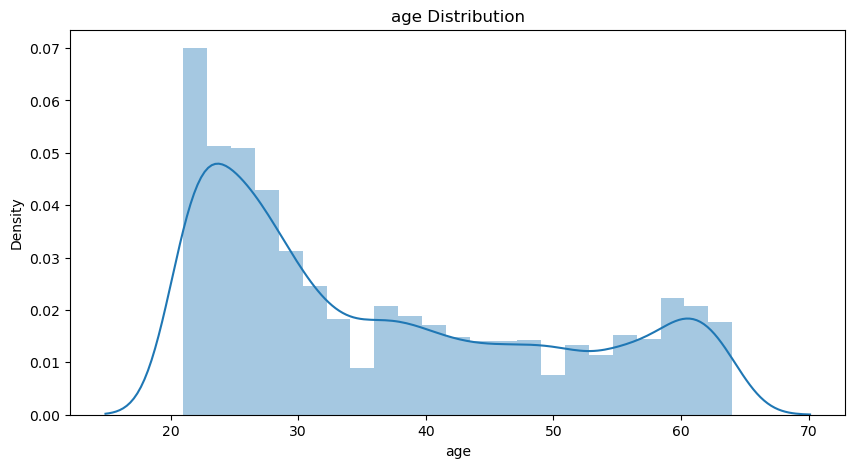

In [30]:
plt.figure(figsize=(10, 5))
plt.title('age Distribution')
sns.distplot(df_reset['age'])
plt.show()

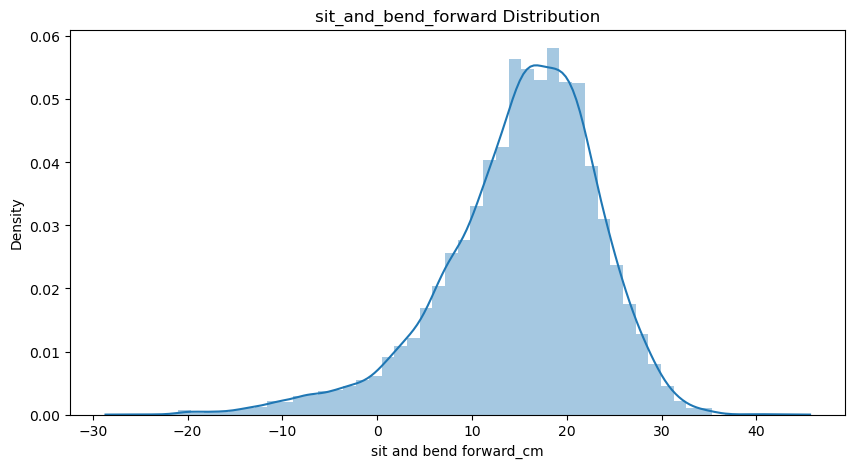

In [31]:
plt.figure(figsize=(10, 5))
plt.title('sit_and_bend_forward Distribution')
sns.distplot(df_reset['sit and bend forward_cm'])
plt.show()

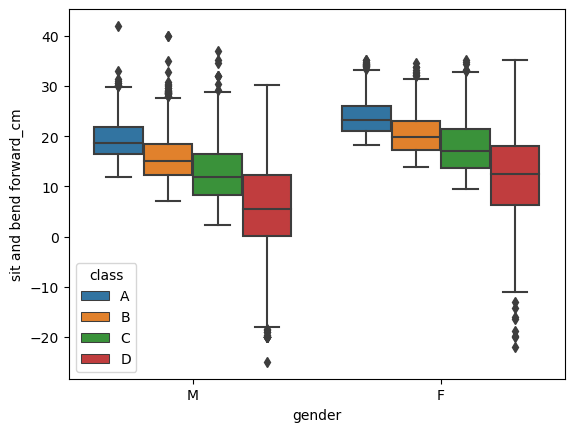

In [32]:
import seaborn as sns
var = 'sit and bend forward_cm'
sns.boxplot(x='gender', y=var, data=df_reset,hue='class',hue_order = ['A','B','C','D'])
#plt.ylim(-30, 70)
plt.show()


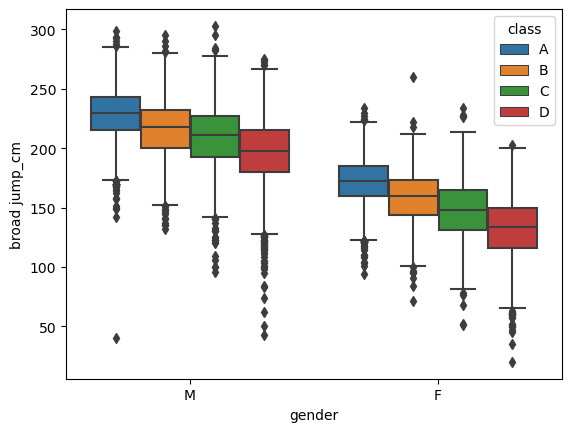

In [33]:
var = 'broad jump_cm'
sns.boxplot(x='gender', y=var, data=df_reset,hue='class',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

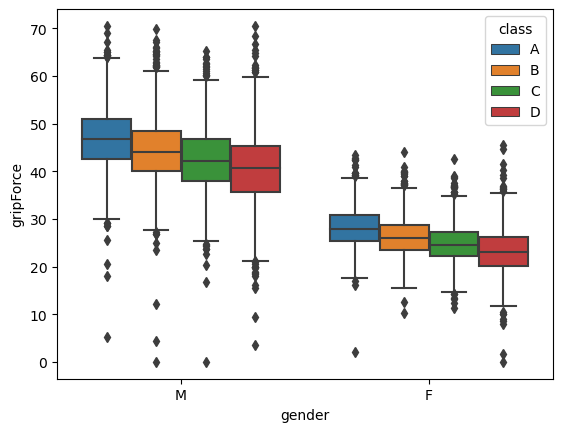

In [34]:
var = 'gripForce'
sns.boxplot(x='gender', y=var, data=df_reset,hue='class',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

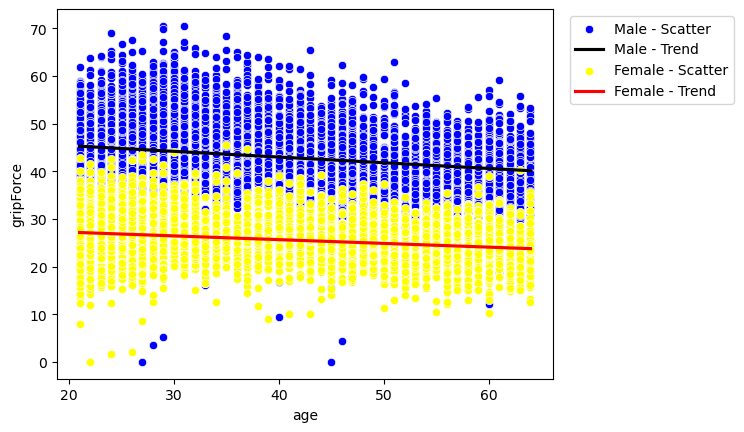

In [35]:
# Filter the data based on gender
male_data = df_reset[df_reset['gender'] == 'M']
female_data = df_reset[df_reset['gender'] == 'F']

# Create a scatter plot for males (blue color) with trend line
sns.scatterplot(y="gripForce", x="age", data=male_data, color='blue', label='Male - Scatter')
sns.regplot(y="gripForce", x="age", data=male_data, scatter=False, color='black', label='Male - Trend')

# Create a scatter plot for females (red color) with trend line
sns.scatterplot(y="gripForce", x="age", data=female_data, color='yellow', label='Female - Scatter')
sns.regplot(y="gripForce", x="age", data=female_data, scatter=False, color='red', label='Female - Trend')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

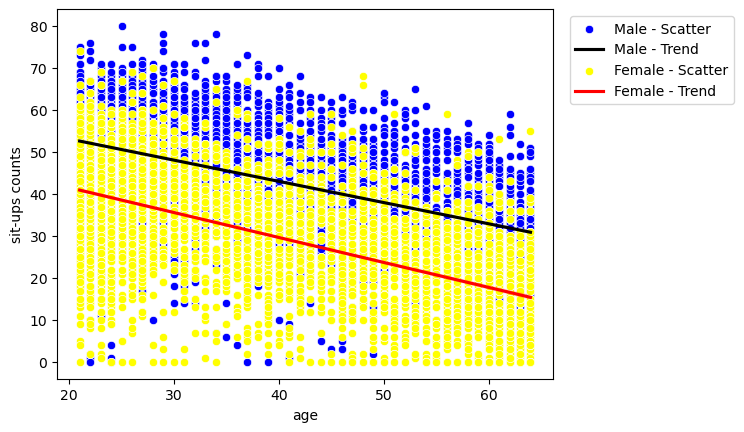

In [36]:
# Filter the data based on gender
male_data = df_reset[df_reset['gender'] == 'M']
female_data = df_reset[df_reset['gender'] == 'F']

# Create a scatter plot for males (blue color) with trend line
sns.scatterplot(y="sit-ups counts", x="age", data=male_data, color='blue', label='Male - Scatter')
sns.regplot(y="sit-ups counts", x="age", data=male_data, scatter=False, color='black', label='Male - Trend')

# Create a scatter plot for females (red color) with trend line
sns.scatterplot(y="sit-ups counts", x="age", data=female_data, color='yellow', label='Female - Scatter')
sns.regplot(y="sit-ups counts", x="age", data=female_data, scatter=False, color='red', label='Female - Trend')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

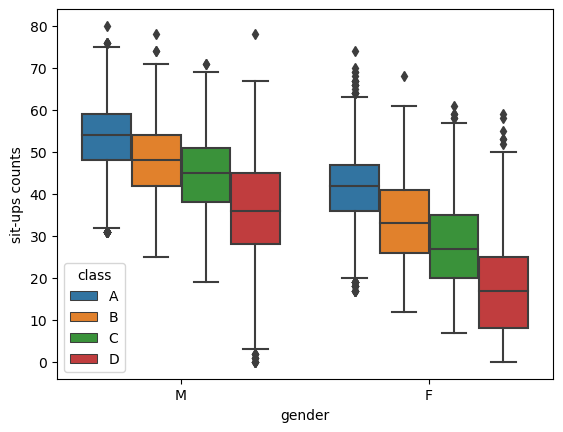

In [37]:
var = 'sit-ups counts'
sns.boxplot(x='gender', y=var, data=df_reset,hue='class',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

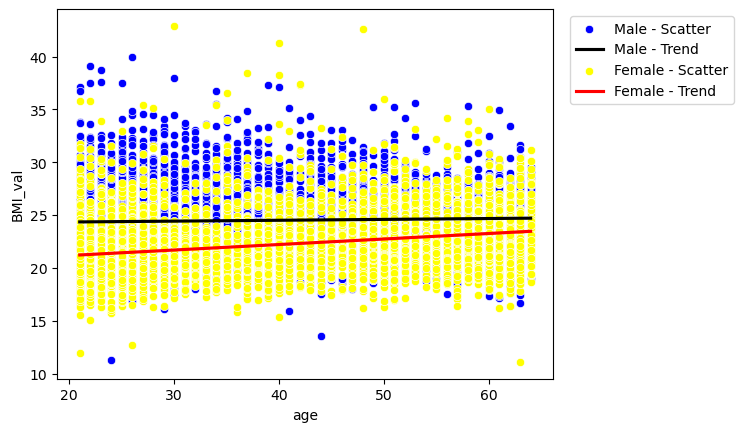

In [38]:
# Filter the data based on gender
male_data = df_reset[df_reset['gender'] == 'M']
female_data = df_reset[df_reset['gender'] == 'F']

# Create a scatter plot for males (blue color) with trend line
sns.scatterplot(y="BMI_val", x="age", data=male_data, color='blue', label='Male - Scatter')
sns.regplot(y="BMI_val", x="age", data=male_data, scatter=False, color='black', label='Male - Trend')

# Create a scatter plot for females (red color) with trend line
sns.scatterplot(y="BMI_val", x="age", data=female_data, color='yellow', label='Female - Scatter')
sns.regplot(y="BMI_val", x="age", data=female_data, scatter=False, color='red', label='Female - Trend')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

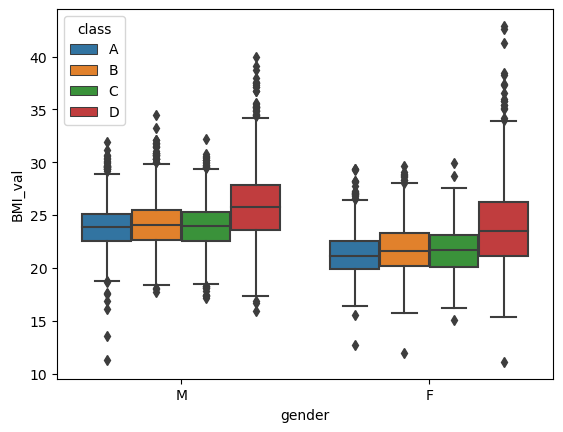

In [39]:
var = 'BMI_val'
sns.boxplot(x='gender', y=var, data=df_reset,hue='class',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

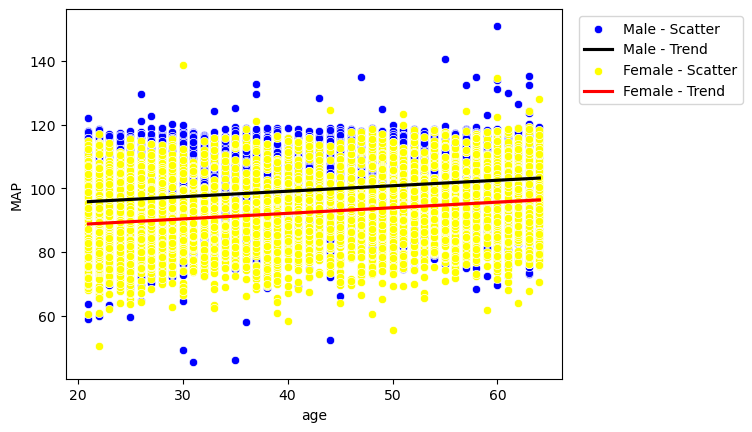

In [40]:
# Filter the data based on gender
male_data = df_reset[df_reset['gender'] == 'M']
female_data = df_reset[df_reset['gender'] == 'F']

# Create a scatter plot for males (blue color) with trend line
sns.scatterplot(y="MAP", x="age", data=male_data, color='blue', label='Male - Scatter')
sns.regplot(y="MAP", x="age", data=male_data, scatter=False, color='black', label='Male - Trend')

# Create a scatter plot for females (red color) with trend line
sns.scatterplot(y="MAP", x="age", data=female_data, color='yellow', label='Female - Scatter')
sns.regplot(y="MAP", x="age", data=female_data, scatter=False, color='red', label='Female - Trend')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

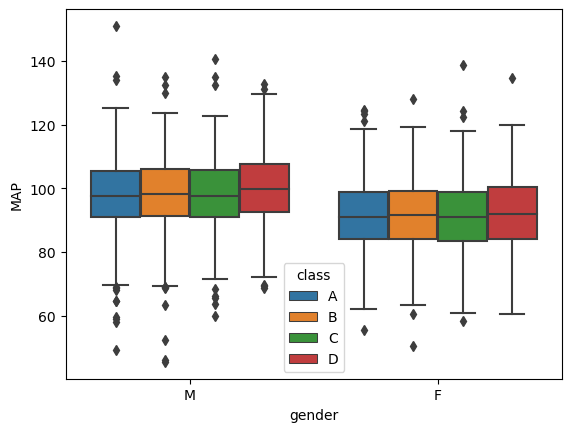

In [41]:
var = 'MAP'
sns.boxplot(x='gender', y=var, data=df_reset,hue='class',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

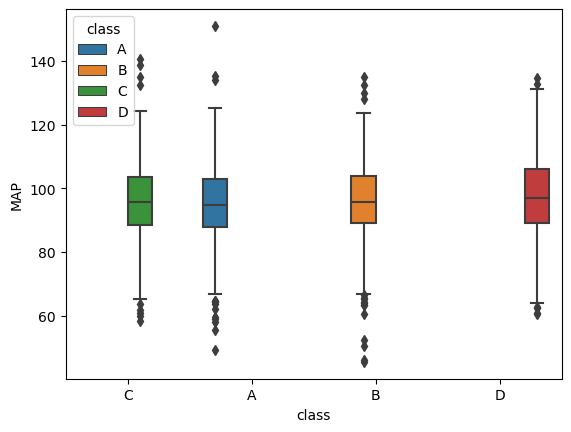

In [42]:
var = 'MAP'
sns.boxplot(x='class', y=var, data=df_reset, hue='class', hue_order=['A', 'B', 'C', 'D'])
#plt.ylim(0, 70)
plt.show()



### Advance Analysis

In [43]:
df_reset.head()

,age,gender,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMI_val,MAP
0,27.0,M,21.3,54.9,18.4,60.0,217.0,C,25.34,96.67
1,25.0,M,15.7,36.4,16.3,53.0,229.0,A,20.50,93.33
2,31.0,M,20.1,44.8,12.0,49.0,181.0,C,24.18,112.00
3,32.0,M,18.4,41.4,15.2,53.0,219.0,B,23.35,99.67
4,28.0,M,17.1,43.5,27.1,45.0,217.0,B,22.41,89.00


In [44]:
df_reset.age = df_reset.age.astype(int)

In [45]:
gender = {'F':0,'M':1}
df_reset['gender'] =df_reset['gender'].replace(gender)

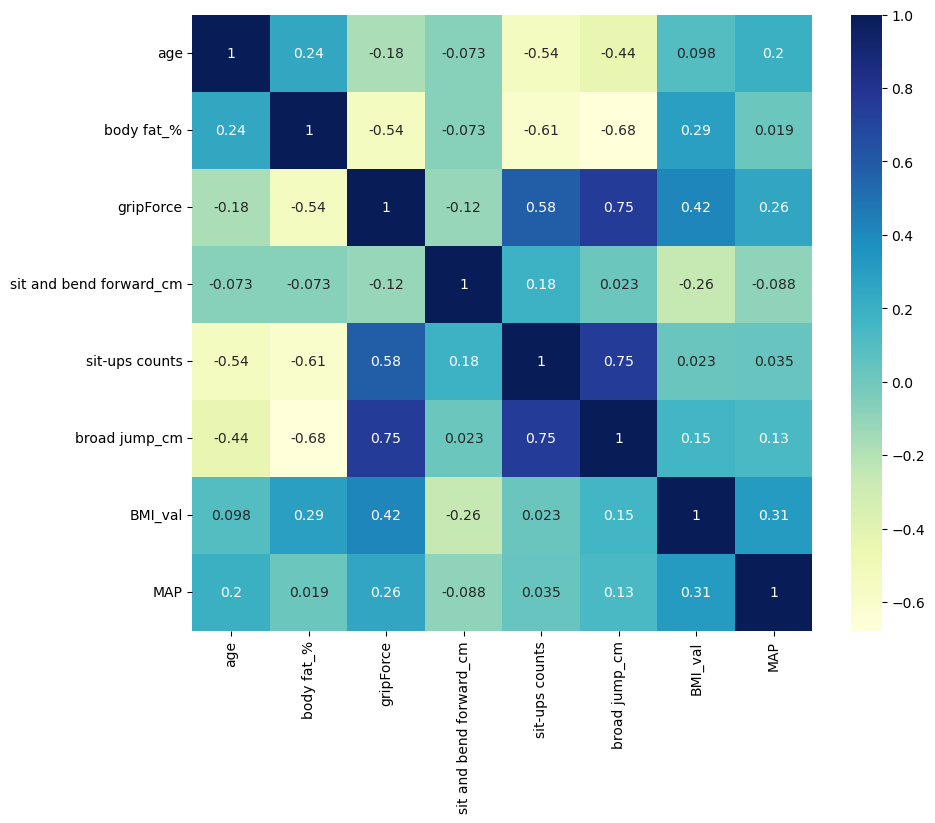

In [46]:
# Create a heatmap using seaborn
df_cts = df_reset.drop(['gender', 'class'], axis=1)
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_cts.corr(),cmap="YlGnBu",annot=True,ax=ax);

In [47]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Select the columns you want to normalize
# columns_to_normalize = ['age', 'body fat_%', 'gripForce',"sit and bend forward_cm","sit-ups counts","broad jump_cm","BMI_val","MAP"]

# # Fit and transform the selected columns using the scaler
# df_reset[columns_to_normalize] = scaler.fit_transform(df_reset[columns_to_normalize])


In [48]:
df_reset.head()

,age,gender,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMI_val,MAP
0,27,1,21.3,54.9,18.4,60.0,217.0,C,25.34,96.67
1,25,1,15.7,36.4,16.3,53.0,229.0,A,20.50,93.33
2,31,1,20.1,44.8,12.0,49.0,181.0,C,24.18,112.00
3,32,1,18.4,41.4,15.2,53.0,219.0,B,23.35,99.67
4,28,1,17.1,43.5,27.1,45.0,217.0,B,22.41,89.00


In [49]:
Class = {'A':0, 'B':1, 'C':2, 'D':3}
df_reset['class'] =df_reset['class'].replace(Class)

In [50]:
df_reset.head()

,age,gender,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMI_val,MAP
0,27,1,21.3,54.9,18.4,60.0,217.0,2,25.34,96.67
1,25,1,15.7,36.4,16.3,53.0,229.0,0,20.50,93.33
2,31,1,20.1,44.8,12.0,49.0,181.0,2,24.18,112.00
3,32,1,18.4,41.4,15.2,53.0,219.0,1,23.35,99.67
4,28,1,17.1,43.5,27.1,45.0,217.0,1,22.41,89.00


In [51]:
x = df_reset.drop('class', axis=1)  # Drop the 'class' column from df_reset
y = df_reset['class']


age: 0.5243275826469038
gender: 0.39693194315519775
body fat_%: 0.31342080968885266
gripForce: 0.21354645468532216
sit and bend forward_cm: 1.297628909322626
sit-ups counts: 0.7731100859905922
broad jump_cm: 0.21496995193165946
BMI_val: 0.2993746945233077
MAP: 0.07945846084196721


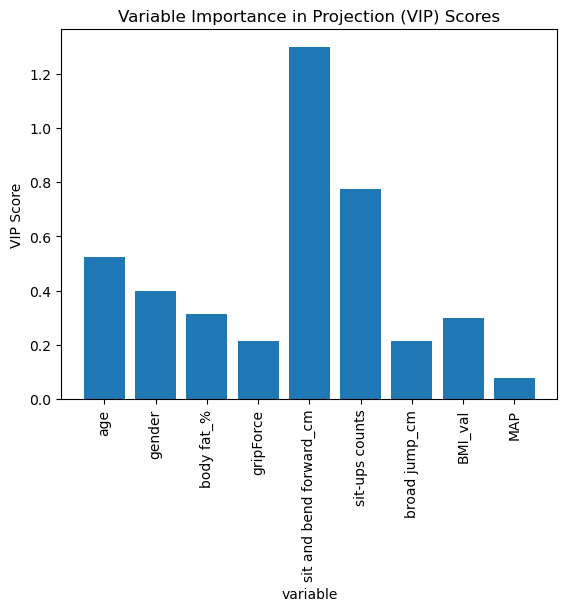

In [52]:
from sklearn.cross_decomposition import PLSRegression

# Fit the PLS regression model
pls_model = PLSRegression(n_components=3)
pls_model.fit(x, y)

# Get the weights from the PLS model
weights = pls_model.coef_

# Calculate the sum of squares of weights for each variable
sum_of_squares = np.sum(weights ** 2, axis=1)

# Normalize the sum of squares
normalized_sum_of_squares = sum_of_squares / np.sum(sum_of_squares)

# Access the variable names from train_feature if possible
if isinstance(x, pd.DataFrame):
    variable_names = x.columns.tolist()
else:
    variable_names = [f"Variable {i+1}" for i in range(x.shape[1])]

# Calculate the VIP scores
vip_scores = np.sqrt(pls_model.n_components * normalized_sum_of_squares)

# Print the VIP scores for each variable
for i, score in enumerate(vip_scores):
    variable_name = variable_names[i]
    print(f"{variable_name}: {score}")

# Assuming 'vip_scores' is a list or array of VIP scores
variables = range(len(vip_scores))

plt.bar(variable_names, vip_scores)
plt.xlabel('variable')
plt.ylabel('VIP Score')
plt.title('Variable Importance in Projection (VIP) Scores')
plt.xticks(rotation='vertical') 
plt.show()

### Split

In [53]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_reset, test_size=0.2, random_state=42)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 10702
No. of testing examples: 2676


In [54]:
y = df_reset['class']
df_reset.drop(['class'], axis=1, inplace=True)
X = df_reset

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)
train_feature2=train_feature
train_feature.head()

,age,gender,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,BMI_val,MAP
6502,25,1,13.4,44.0,11.1,35.0,200.0,22.96,106.00
9145,23,0,22.7,28.5,8.6,30.0,143.0,22.34,104.67
414,25,1,22.0,49.8,21.2,58.0,226.0,23.71,98.67
9739,51,1,17.1,40.1,23.7,62.0,205.0,23.96,110.00
11832,24,1,31.8,37.2,9.0,50.0,217.0,27.99,109.00


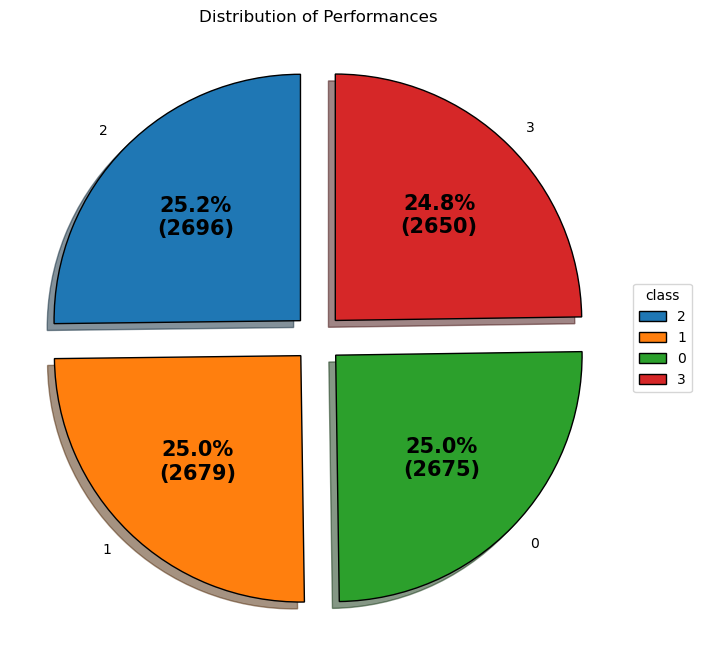

In [55]:
# Create a figure and axes for the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(train_label.value_counts(),
                                  autopct=lambda pct: pie(pct, train_label.value_counts()),
                                  explode=(.1, .1, .1, 0.1),
                                  labels=train_label.value_counts().index,
                                  shadow=True,
                                  startangle=90,
                                  wedgeprops={'linewidth': 1, 'edgecolor': "black"},
                                  textprops=dict(color="black"))

# Adding legend
ax.legend(wedges, train_label.value_counts().index, title='class',
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Distribution of Performances")

# Display the pie chart
plt.show()


### Try models

In [56]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVC': SVC(probability=True),
    'LDA': LDA(),
    'Multiple Logistic': LogisticRegression(solver='liblinear', multi_class='auto'),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'Gradient Boost': GradientBoostingClassifier(criterion="friedman_mse"),
    'Ridge': LogisticRegression(solver='saga', multi_class='multinomial', penalty='l2', C=1.0),
    'Lasso': LogisticRegression(solver='saga', multi_class='multinomial', penalty='l1', C=1),
}

table_rows = []
selected_variables = []

for name, model in models.items():
    model.fit(train_feature, train_label)
    
    # Get the selected variables
    if hasattr(model, 'feature_importances_'):
        # For tree-based models
        sfm = SelectFromModel(model, threshold=0.01)
        sfm.fit(train_feature, train_label)
        selected = sfm.get_support()
        selected_variables.append(list(train_feature.columns[selected]))
    elif hasattr(model, 'coef_'):
        # For linear models
        selected_variables.append(list(train_feature.columns[model.coef_[0] != 0]))
    else:
        selected_variables.append([])
    
    # Training set
    train_pred = model.predict(train_feature)
    train_acc = accuracy_score(train_label, train_pred)
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature)
    test_acc = accuracy_score(test_label, test_pred)
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    row = [name, train_acc, train_f1, test_acc, test_f1]
    table_rows.append(row)
    
# Define the headers for the table
headers = ["Model", "Train Accuracy", "Train F1 Score", "Test Accuracy", "Test F1 Score"]

# Print the table using the tabulate function
print(tabulate(table_rows, headers=headers, tablefmt="fancy_grid"))

# Print the selected variables for each model
for i, name in enumerate(models.keys()):
    print(f"Selected variables for {name}: {selected_variables[i]}")


╒═══════════════════╤══════════════════╤══════════════════╤═════════════════╤═════════════════╕
│ Model             │   Train Accuracy │   Train F1 Score │   Test Accuracy │   Test F1 Score │
╞═══════════════════╪══════════════════╪══════════════════╪═════════════════╪═════════════════╡
│ Random Forest     │         0.999907 │         0.999907 │        0.745516 │        0.746555 │
├───────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ XGBoost           │         0.942628 │         0.942724 │        0.745889 │        0.747344 │
├───────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ SVC               │         0.601944 │         0.601728 │        0.613602 │        0.614662 │
├───────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ LDA               │         0.613717 │         0.61473  │        0.615845 │        0.61779  │
├───────────────────┼──────────────────┼

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Reshape the variable to a 2D array
variable_to_rescale = train_feature[['sit and bend forward_cm']]

# Apply the MinMaxScaler to the selected variable
train_feature_scaled = train_feature.copy()  # Create a copy of the original DataFrame
train_feature_scaled[['sit and bend forward_cm']] = scaler.fit_transform(variable_to_rescale)


In [58]:
negative_rows = train_feature_scaled[(train_feature_scaled< 0).any(axis=1)]
print(negative_rows)


Empty DataFrame
Columns: [age, gender, body fat_%, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm, BMI_val, MAP]
Index: []


In [59]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top k features
k = 'all'  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(train_feature_scaled, train_label)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = train_feature.columns[selected_indices]

# Get the scores of the selected features
selected_feature_scores = selector.scores_[selected_indices]

# Print the selected feature names and scores
print("Selected Features and Scores:")
for name, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{name}: {score}")


Selected Features and Scores:
age: 242.7137362050354
gender: 32.46377659170306
body fat_%: 3293.8217418497593
gripForce: 599.1452425381503
sit and bend forward_cm: 99.17250463858431
sit-ups counts: 11409.224019000758
broad jump_cm: 6023.960322339804
BMI_val: 405.35351740844754
MAP: 63.254829039436345


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier on your training data
rf.fit(train_feature, train_label)

# Get the feature importances
feature_importances = rf.feature_importances_

# Sort the features based on their importance scores
sorted_indices = feature_importances.argsort()[::-1]

# Print the feature names and their importance scores
print("Feature Importance:")
for i in sorted_indices:
    print(f"{train_feature.columns[i]}: {feature_importances[i]}")


Feature Importance:
sit and bend forward_cm: 0.277392387930755
sit-ups counts: 0.14749421561032455
BMI_val: 0.10879683329994816
age: 0.10525024535943626
body fat_%: 0.1011648794191906
gripForce: 0.09125120689069902
broad jump_cm: 0.0852492538576471
MAP: 0.06654327970006575
gender: 0.01685769793193364


In [61]:
#with all

from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boost': GradientBoostingClassifier(criterion="friedman_mse"),
}

table_rows = []

for name, model in models.items():
    model.fit(train_feature, train_label)
    
    # Training set
    train_pred = model.predict(train_feature)
    train_acc = accuracy_score(train_label, train_pred)
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature)
    test_acc = accuracy_score(test_label, test_pred)
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    row = [name, train_acc, train_f1, test_acc, test_f1]
    table_rows.append(row)
    
# Define the headers for the table
headers = ["Model", "Train Accuracy", "Train F1 Score", "Test Accuracy", "Test F1 Score"]

# Print the table using the tabulate function
print(tabulate(table_rows, headers=headers, tablefmt="fancy_grid"))


╒════════════════╤══════════════════╤══════════════════╤═════════════════╤═════════════════╕
│ Model          │   Train Accuracy │   Train F1 Score │   Test Accuracy │   Test F1 Score │
╞════════════════╪══════════════════╪══════════════════╪═════════════════╪═════════════════╡
│ Random Forest  │         1        │         1        │        0.739537 │        0.74149  │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ XGBoost        │         0.942628 │         0.942724 │        0.745889 │        0.747344 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ Gradient Boost │         0.771258 │         0.770836 │        0.733931 │        0.73402  │
╘════════════════╧══════════════════╧══════════════════╧═════════════════╧═════════════════╛


In [62]:
train_feature_selected2 = train_feature.drop(['MAP'], axis=1)
test_feature_selected2 = test_feature.drop(['MAP'], axis=1)

In [63]:
#without map

from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boost': GradientBoostingClassifier(criterion="friedman_mse"),
}

table_rows = []

for name, model in models.items():
    model.fit(train_feature_selected2, train_label)
    
    # Training set
    train_pred = model.predict(train_feature_selected2)
    train_acc = accuracy_score(train_label, train_pred)
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature_selected2)
    test_acc = accuracy_score(test_label, test_pred)
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    row = [name, train_acc, train_f1, test_acc, test_f1]
    table_rows.append(row)
    
# Define the headers for the table
headers = ["Model", "Train Accuracy", "Train F1 Score", "Test Accuracy", "Test F1 Score"]

# Print the table using the tabulate function
print(tabulate(table_rows, headers=headers, tablefmt="fancy_grid"))


╒════════════════╤══════════════════╤══════════════════╤═════════════════╤═════════════════╕
│ Model          │   Train Accuracy │   Train F1 Score │   Test Accuracy │   Test F1 Score │
╞════════════════╪══════════════════╪══════════════════╪═════════════════╪═════════════════╡
│ Random Forest  │         1        │         1        │        0.735426 │        0.737241 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ XGBoost        │         0.930761 │         0.930902 │        0.755979 │        0.758576 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ Gradient Boost │         0.772005 │         0.771693 │        0.7358   │        0.735985 │
╘════════════════╧══════════════════╧══════════════════╧═════════════════╧═════════════════╛


In [64]:
train_feature_selected3 = train_feature.drop(['gender'], axis=1)
test_feature_selected3 = test_feature.drop(['gender'], axis=1)

In [65]:
#without gender

from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boost': GradientBoostingClassifier(criterion="friedman_mse"),
}

table_rows = []

for name, model in models.items():
    model.fit(train_feature_selected3, train_label)
    
    # Training set
    train_pred = model.predict(train_feature_selected3)
    train_acc = accuracy_score(train_label, train_pred)
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature_selected3)
    test_acc = accuracy_score(test_label, test_pred)
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    row = [name, train_acc, train_f1, test_acc, test_f1]
    table_rows.append(row)
    
# Define the headers for the table
headers = ["Model", "Train Accuracy", "Train F1 Score", "Test Accuracy", "Test F1 Score"]

# Print the table using the tabulate function
print(tabulate(table_rows, headers=headers, tablefmt="fancy_grid"))


╒════════════════╤══════════════════╤══════════════════╤═════════════════╤═════════════════╕
│ Model          │   Train Accuracy │   Train F1 Score │   Test Accuracy │   Test F1 Score │
╞════════════════╪══════════════════╪══════════════════╪═════════════════╪═════════════════╡
│ Random Forest  │         1        │         1        │        0.733558 │        0.733138 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ XGBoost        │         0.940852 │         0.940999 │        0.743647 │        0.744904 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ Gradient Boost │         0.760138 │         0.760029 │        0.721973 │        0.722489 │
╘════════════════╧══════════════════╧══════════════════╧═════════════════╧═════════════════╛


In [66]:
train_feature_selected4 = train_feature.drop(['gender','MAP'], axis=1)
test_feature_selected4 = test_feature.drop(['gender','MAP'], axis=1)

In [67]:
# without gender, map

from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boost': GradientBoostingClassifier(criterion="friedman_mse"),
}

table_rows = []

for name, model in models.items():
    model.fit(train_feature_selected4, train_label)
    
    # Training set
    train_pred = model.predict(train_feature_selected4)
    train_acc = accuracy_score(train_label, train_pred)
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature_selected4)
    test_acc = accuracy_score(test_label, test_pred)
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    row = [name, train_acc, train_f1, test_acc, test_f1]
    table_rows.append(row)
    
# Define the headers for the table
headers = ["Model", "Train Accuracy", "Train F1 Score", "Test Accuracy", "Test F1 Score"]

# Print the table using the tabulate function
print(tabulate(table_rows, headers=headers, tablefmt="fancy_grid"))


╒════════════════╤══════════════════╤══════════════════╤═════════════════╤═════════════════╕
│ Model          │   Train Accuracy │   Train F1 Score │   Test Accuracy │   Test F1 Score │
╞════════════════╪══════════════════╪══════════════════╪═════════════════╪═════════════════╡
│ Random Forest  │         1        │         1        │        0.744395 │        0.744419 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ XGBoost        │         0.92693  │         0.927028 │        0.744021 │        0.746415 │
├────────────────┼──────────────────┼──────────────────┼─────────────────┼─────────────────┤
│ Gradient Boost │         0.760605 │         0.760232 │        0.721599 │        0.721915 │
╘════════════════╧══════════════════╧══════════════════╧═════════════════╧═════════════════╛
